In [1]:
import os
import pickle
import pandas as pd
import signalprocessing as sigp
import seaborn as sn
import soundmfccparams as smfccp

In [2]:
# Path for packs
#signalPath = r"/home/vaclav/Desktop/Diploma/Dirty Signals/Test/Test08/"
signalPath = r"/home/vaclav/Desktop/Diploma/Dirty Signals/snd.L-01.P3/20200226/"
# Path for RandomForestClassifier
classifierPath = "/home/vaclav/Desktop/Diploma/Notebooks/Classifier/classificator.sav"

In [34]:
# Extracting the dataframes (data characteristics)
signalDataFrame = sigp.extract_data(signalPath)

/home/vaclav/Desktop/Diploma/Notebooks/Classifier/signalprocessing.py:339: RuntimeWarning: divide by zero encountered in log
  return (np.exp((1 / length) * np.sum(np.log(magnitudes)))) / ((1 / length) * np.sum(magnitudes))


In [35]:
#signalDataFrame = smfccp.pca_dataframe(signalDataFrame, 15)
#rng = range(0, int((len(list(signalDataFrame))-1)/2)+1)
#new_cols = ['type_' + str(i) for i in rng] + ['expt_' + str(i) for i in rng]
#signalDataFrame.columns = new_cols[:len(list(signalDataFrame))]
signalDataFrame.to_csv("20200226.csv", sep='\t', encoding='utf-8', index=False)

In [8]:
signalDataFrame = pd.read_csv('/home/vaclav/Desktop/Diploma/Notebooks/Classifier/DataBaseCsv/20200214.csv', sep='\t') 
signalDataFrame

,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,MFCC_0,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,93240.583770,9988.293189,67672.354558,55237.286082,14976.857173,2460.610233,4445.651190,7.991650e+06,0.003905,-390.482635,...,-12.061046,5.458634,2.488945,-1.667278,11.096888,-1.362963,12.493773,-2.500314,5.289125,-0.613455
1,181199.398430,89328.536080,91097.683173,91012.031422,89088.362851,3008.171602,1957.117464,2.667242e+06,0.002803,-222.390930,...,-11.383979,9.356848,-6.532741,2.367631,4.866090,3.255502,9.284393,-1.730622,9.925528,-4.039388
2,102544.072118,61718.808264,63313.250445,37342.622717,34455.644598,2301.199092,1840.895105,4.192616e+06,0.003918,-281.020508,...,-13.124221,8.452343,-3.925497,6.039720,6.811212,3.509739,9.803226,-1.078397,7.680036,-5.372687
3,107620.422142,27471.188978,50684.259045,61916.887733,60354.611719,4607.817226,2251.184477,2.288118e+06,0.003134,-315.266815,...,0.278767,16.063534,-14.618764,8.851604,10.544152,3.636892,-0.426202,2.945140,14.770749,-13.277575
4,124521.903153,61122.523428,72881.756752,48185.636274,46749.976839,3705.186808,1654.602062,3.056248e+06,0.003223,-264.671997,...,-8.734258,5.006228,-2.277801,10.039593,9.428361,-0.096065,7.979488,-1.088838,8.080601,-6.505056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,189971.633905,86486.459797,91502.969724,98905.727442,100420.568172,3086.262360,2039.746417,3.511056e+06,0.002958,-209.338028,...,-16.515646,9.852485,-2.845838,6.176266,6.556022,2.353662,9.242784,-1.408240,8.492785,-5.204085
1988,129108.542295,59504.320320,53421.763831,66092.742490,74105.399915,2545.929063,2013.130720,4.571912e+06,0.003580,-259.994415,...,-15.394554,10.671451,-3.556627,8.635319,5.573764,3.559573,8.924287,-1.956040,9.035350,-7.122851
1989,67529.839510,51055.040352,32521.734246,15112.910872,23766.436732,1798.697541,1572.944685,3.535259e+06,0.004402,-356.566345,...,-9.778419,6.118529,0.161151,6.111169,5.544592,3.436631,8.611018,-0.725877,7.605276,-3.990145
1990,120009.449494,22420.470128,35703.892180,61092.072121,92573.704228,3154.272312,1310.644294,2.382456e+06,0.002697,-303.183075,...,-10.471877,10.092571,-4.203760,9.160062,3.794143,5.975085,5.582438,-0.930648,7.600579,-4.133555


In [9]:
# Load the model from disk
loaded_model = pickle.load(open(classifierPath, 'rb'))

In [10]:
# Predicting the classification
predictedData = loaded_model.predict(signalDataFrame)
predictedsignalDataFrame = signalDataFrame.assign(Flag=predictedData)

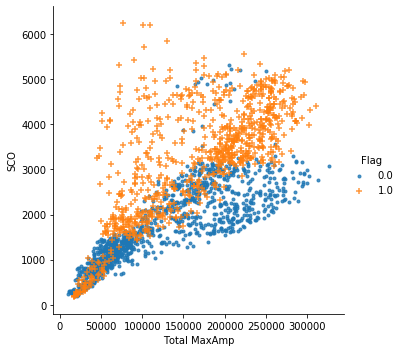

In [11]:
sn.lmplot('Total MaxAmp', 'SCO', data=predictedsignalDataFrame, hue="Flag", fit_reg=False, markers=['.','+'])

In [77]:
# Loading wav files for spectrogramms
audiolist = sigp.load_list_of_wav(signalPath)
temp = audiolist
ppredictedsignalDataFrame = predictedsignalDataFrame.loc[predictedsignalDataFrame['Flag'] == 1]

In [78]:
ppredictedsignalDataFrame.head()

,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,MFCC_0,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,Flag
0,93240.583770,9988.293189,67672.354558,55237.286082,14976.857173,2460.610233,4445.651190,7.991650e+06,0.003905,-390.482635,...,5.458634,2.488945,-1.667278,11.096888,-1.362963,12.493773,-2.500314,5.289125,-0.613455,1.0
3,107620.422142,27471.188978,50684.259045,61916.887733,60354.611719,4607.817226,2251.184477,2.288118e+06,0.003134,-315.266815,...,16.063534,-14.618764,8.851604,10.544152,3.636892,-0.426202,2.945140,14.770749,-13.277575,1.0
4,124521.903153,61122.523428,72881.756752,48185.636274,46749.976839,3705.186808,1654.602062,3.056248e+06,0.003223,-264.671997,...,5.006228,-2.277801,10.039593,9.428361,-0.096065,7.979488,-1.088838,8.080601,-6.505056,1.0
5,130621.130641,76312.064215,60632.820571,85353.528712,17078.141214,3248.793342,1549.922228,3.236072e+06,0.003139,-310.510712,...,6.651706,0.836079,6.141292,3.859857,4.183518,6.988857,0.695487,8.051206,-2.957005,1.0
6,111920.970552,75271.247596,45608.193448,48166.215556,43339.085529,1962.725839,2257.904712,4.959883e+06,0.004033,-277.106171,...,6.608745,0.237661,8.960531,2.479568,2.720680,10.424706,-3.088700,8.464871,-4.707378,1.0


No handles with labels found to put in legend.


Signal amount is  812
Signal № 120
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


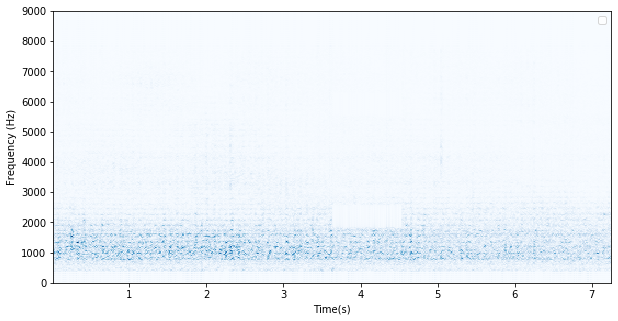

No handles with labels found to put in legend.


Signal № 122
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


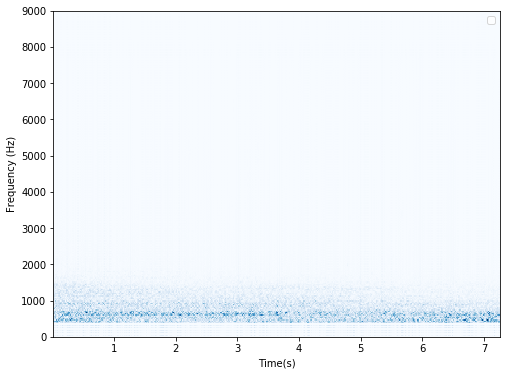

No handles with labels found to put in legend.


Signal № 123
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


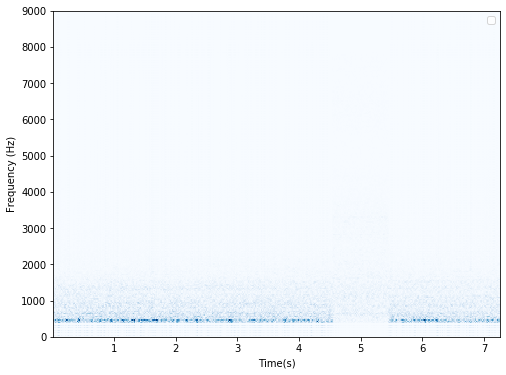

No handles with labels found to put in legend.


Signal № 127
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


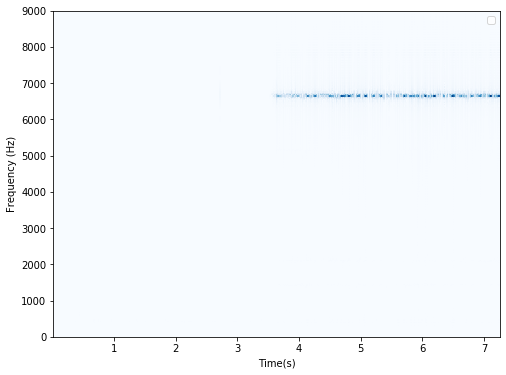

No handles with labels found to put in legend.


Signal № 131
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


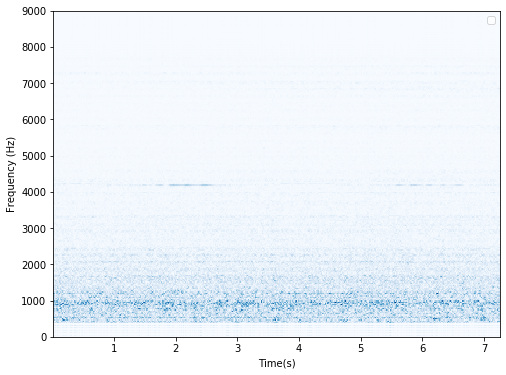

<Figure size 576x432 with 0 Axes>

In [85]:
sigp.plot_all_spectrogramms(audiolist, predictedsignalDataFrame, 512, 50, 55, 1) # last param is activator , 1 - start, 0 - none

In [90]:
audiolist[120].make_audio()

In [12]:
#sigp.copy_filtered_signal(signalPath, 850)

In [13]:
# Freeing the memory
del audiolist[:]
audiolist = None
del audiolist